In [12]:
import os
import numpy as np
import pandas as pd
from scipy.stats import kstest,ttest_ind
import itertools as it
from collections import Counter
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [5]:
maf_types = ["001", "0001"]
multi_test_types = ["BH", "bonf"]
combos = [2,3,4]
combo_save_dir = "/data6/deepro/ukb_bmi/2_rarecomb/data/british/"

In [8]:
# Add number of combos per analysis
# Add number of unique genes per analysis

def get_num_combo(combo_df):
    return len(combo_df)

def get_num_uniq_genes(combo_df):
    ugenes = "|".join(combo_df.uniq_items.values).split("|")
    return len(set(ugenes))


combo_info_df = {
    "maf": [],
    "multi_test": [],
    "combo": [],
    "ncombo": [],
    "ngenes": []
    }

for maf in maf_types:
    for mt in multi_test_types:
        for c in combos:
            combo_file = os.path.join(combo_save_dir, f"{mt}_{maf}", f"combo{c}.csv")
            
            if os.path.exists(combo_file):
                combo_df = pd.read_csv(combo_file)
                ncombo = get_num_combo(combo_df)
                ngenes = get_num_uniq_genes(combo_df)
            else:
                ncombo = 0
                ngenes = 0
            combo_info_df["maf"].append(maf)
            combo_info_df["multi_test"].append(mt)
            combo_info_df["combo"].append(c)
            combo_info_df["ncombo"].append(ncombo)
            combo_info_df["ngenes"].append(ngenes)


In [9]:
combo_info_df = pd.DataFrame(combo_info_df)

In [11]:
combo_info_df["parameters"] = combo_info_df.multi_test + "_" + combo_info_df.maf 

In [15]:
combo_info_df = combo_info_df.melt(id_vars=["parameters", "combo"], value_vars=["ncombo", "ngenes"])

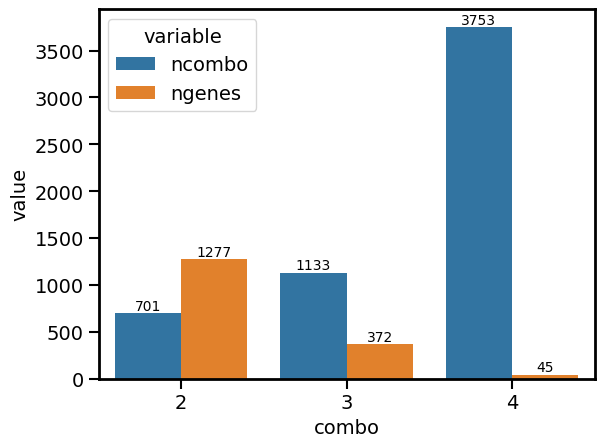

In [39]:
ax = sns.barplot(combo_info_df.loc[combo_info_df.parameters=="BH_001"], x="combo", y="value", hue="variable",)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10);

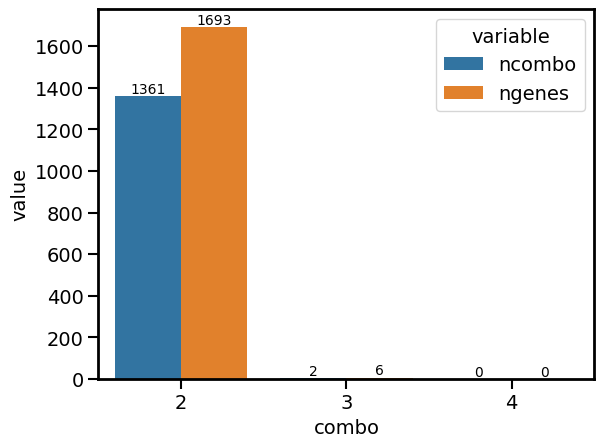

In [40]:
ax = sns.barplot(combo_info_df.loc[combo_info_df.parameters=="BH_0001"], x="combo", y="value", hue="variable",)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10);

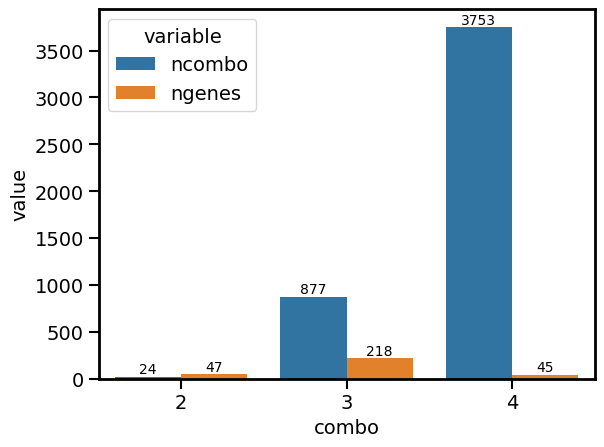

In [41]:
ax = sns.barplot(combo_info_df.loc[combo_info_df.parameters=="bonf_001"], x="combo", y="value", hue="variable",)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10);

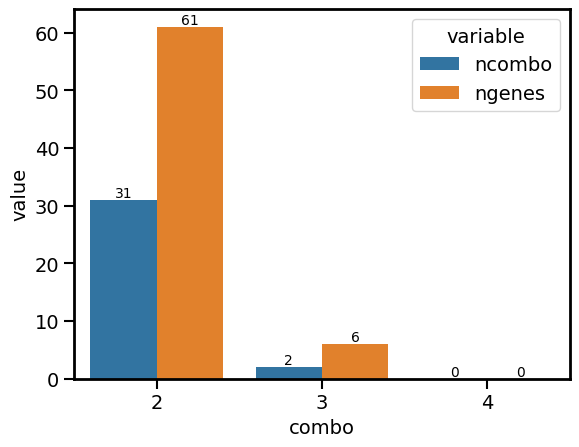

In [42]:
ax = sns.barplot(combo_info_df.loc[combo_info_df.parameters=="bonf_0001"], x="combo", y="value", hue="variable",)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10);